Look at fpdock + ddG with smbit peptides.    

In [2]:
from os import listdir
import pandas as pd
import numpy as np

In [3]:
dirp = './decoys/score12/'
files = listdir(dirp)

print(len(files))
data_files = []
for file in files:
    if ".json" in file:
        data_files.append(file)
print(len(data_files))

218
218


In [5]:
kds = {'peptide86':0.7E-9,
           'peptide78':3.4E-9,
           'peptide79':8.5E-9,
           'peptide99':1.8E-7,
           'peptide128':2.8E-7,
           'native_test':0.9E-6,
           'peptide104':1.3E-6,
           'peptide101':2.5E-6,
           'peptide114':1.9E-4
           }

frames = []
for file in data_files:
    df = pd.read_json(dirp+file, orient='records', lines=True)
    peptide = file.split('.')[0]
    df['peptide'] = peptide
    df['kd'] = kds[peptide]
    frames.append(df)
data = pd.concat(frames)

In [6]:
data.head()

,A_B binding energy,fa_atr,fa_rep,fa_sol,fa_intra_rep,pro_close,fa_pair,hbond_sr_bb,hbond_lr_bb,hbond_bb_sc,...,dslf_ss_dih,dslf_ca_dih,rama,omega,fa_dun,p_aa_pp,ref,total_score,peptide,kd
0,-45.726311,-945.832271,234.432157,532.962252,418.897273,1.213613,-15.552444,-32.474634,-75.314595,-11.135248,...,0,0,-48.255936,92.851660,323.374843,-59.613901,-26.66,-269.466342,peptide128,2.800000e-07
0,-48.589066,-940.980608,232.200413,525.063921,416.815169,1.091408,-15.823889,-32.474634,-74.672803,-11.827774,...,0,0,-49.421709,90.798416,313.286188,-59.694142,-26.93,-281.943886,peptide99,1.800000e-07
0,-46.378220,-944.313149,245.305893,528.547052,427.387975,1.099686,-16.787308,-32.474634,-77.545272,-11.687729,...,0,0,-48.000718,92.346508,320.098594,-56.939358,-25.53,-271.321601,native_test,9.000000e-07
0,-44.849197,-937.831440,246.632618,523.772692,431.809250,1.182889,-17.703867,-32.474634,-75.968925,-11.336147,...,0,0,-48.559392,92.959581,333.788083,-60.381249,-27.47,-260.682847,peptide104,1.300000e-06
0,-41.485668,-942.021174,245.090300,534.158340,418.407089,1.200468,-17.028983,-32.474634,-73.882624,-11.128726,...,0,0,-48.480701,93.260128,327.345732,-60.476055,-27.47,-257.807271,peptide104,1.300000e-06


In [7]:
peptides = set(data['peptide'])
tops = []
for peptide in peptides:
    p = data[data['peptide']==peptide]
    p = p.sort_values(by='total_score')
    t = p[:5]
    tops.append(t)
data_top10 = pd.concat(tops)

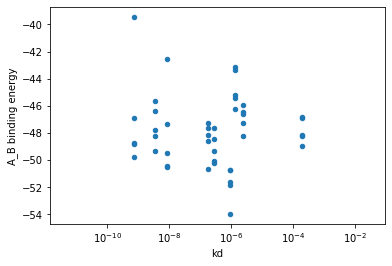

In [12]:
import seaborn as sn
import matplotlib.pyplot as plt

#plt.figure(figsize=(20,5))
#sn.scatter(x='kd', y='ddG', data=data_top10)
data_top10.plot(x='kd', y='A_B binding energy', kind='scatter', logx=True)

In [10]:
data_top10.corr()['kd']

A_B binding energy    0.012398
fa_atr               -0.056535
fa_rep                0.031721
fa_sol               -0.253126
fa_intra_rep          0.054681
pro_close             0.426270
fa_pair               0.428787
hbond_sr_bb           0.054224
hbond_lr_bb           0.229763
hbond_bb_sc           0.405098
hbond_sc              0.285408
dslf_ss_dst                NaN
dslf_cs_ang                NaN
dslf_ss_dih                NaN
dslf_ca_dih                NaN
rama                  0.312141
omega                 0.035977
fa_dun                0.246089
p_aa_pp               0.264026
ref                   0.140814
total_score           0.258262
kd                    1.000000
Name: kd, dtype: float64

Looks like there is a correlation but it's not great. I think this would be improved if we fpdock on the WT and found that dG first, then plug that in to all the runs (or subtract them afterward). This would save a lot of computational time as well. **So rewrite ddG as just dG, eliminating the need for a WT pose as well.**

That didn't work. It's more or less the same. I guess binding energy doesn't really tell us much. Do we need to be recording the ```total_score``` immediately after ```fpdock``` does this change a lot after the dG calc? What are the numbers like when there is a reference structure given to ```fpdock```? How is that done?